# D’oh! Unevenly spaced time series analysis of The Simpsons in Pandas
#### [PyData Seattle 2017 tutorial](https://pydata.org/seattle2017/schedule/presentation/104/)
#### [Joe McCarthy](http://interrelativity.com/joe/), Data Scientist, [Indeed](https://www.indeed.com)



## Motivations

### Unevenly spaced opportunities to do unevenly spaced time series data analysis

<p><a href="http://pandas.pydata.org/"><img src="http://pandas.pydata.org/_static/pandas_logo.png" style="margin: 0px 0px 10px 20px; width: 150px; float: right;" title="pandas" alt="pandas_logo.png" /></a>I occasionally need to analyze gaps between events of interest, but not so often that I remember how to do it. I end up searching through my notebooks to remind myself which Pandas methods to use, and how to use them. I wanted to create a protypical example notebook that I can more easily reference .. and wanted to share it with others, in case they might also find it useful.</p>

### Data.world

<p><a href="https://data.world"><img src="https://d2ogkq1rg66kh0.cloudfront.net/site-resources/images/fb-image-share.7b15f964.jpg" style="margin: 0px 12px 5px 20px; width: 125px; float: right;" title="data.world" alt="data_world_logo.png" /></a>The last time I hunted down a notebook containing unevenly spaced time series analysis was around the time I first heard about the [data.world](https://data.world) platform for creating, sharing and collaborating on data sets .. I think of it as a GitHub for data.</p>

<p><a href="https://www.dataquest.io"><img src="http://data-science-hack.com/wp-content/uploads/2016/04/dataquest-io-1-1.png" style="margin: 0px 0px 5px 20px; width: 125px; float: right;" title="dataquest.io" alt="dataquest-io-logo.png" /></a>I was further inspired about using data.world after reading a great tutorial created by Josh Devlin at [Dataquest.io](https://www.dataquest.io) on [Turbocharge Your Data Acquisition using the data.world Python Library](https://www.dataquest.io/blog/datadotworld-python-tutorial/). This is also where I discovered the dataset about The Simpsons episodes, which I think is more entertaining and generally accessible than the datasets I typically work with at Indeed (although those are interesting, too).</p>

### PyData redemption

I gave a tutorial on [Python for Data Science](https://pydata.org/seattle2015/schedule/presentation/8/) at PyData Seattle 2015, wherein I tried to squeeze a 4-hour tutorial into a 2-hour slot. It didn't work out so well, though I did make the [Jupyter Notebook from the tutorial](http://nbviewer.jupyter.org/github/gumption/Python_for_Data_Science/blob/master/Python_for_Data_Science_all.ipynb) publicly available, so attendees could go back over some of the things we rushed through or didn't even get to. 

For PyData Seattle 2017, I decided to propose a topic that I estimated would take more like an hour, so that we can take a somewhat more leisurely approach .. and, with any luck, we'll be able to get to lunch before the other morning tutorials let out. 

And I will be making this notebook publicly available as well.

## Using Python and Pandas in a Jupyter Notebook

Among the prerequisites for this tutorial are to have Python, Pandas and Jupyter Notebook installed on your computer. In case anyone has a computer that does not yet meet these requirements, I recommend downloading and installing [Anaconda](https://www.continuum.io/downloads), an open data science platform for Python, which includes Pandas, Jupyter Notebook and a variety of other useful open source Python libraries. 

### Python 2 vs. Python 3

There are 2 major versions of Python in widespread use: [Python 2](https://docs.python.org/2/) and [Python 3](https://docs.python.org/3/). Python 3 has some features that are not backward compatible with Python 2, and some Python 2 libraries have not been updated to work with Python 3. I have been using Python 2, primarily because I use some of those Python 2[-only] libraries, but an increasing proportion of them are migrating to Python 3, and I anticipate shifting to Python 3 in the near future.

For more on the topic, I recommend a very well documented IPython Notebook, which includes numerous helpful examples and links, by [Sebastian Raschka](http://sebastianraschka.com/), [Key differences between Python 2.7.x and Python 3.x](http://nbviewer.ipython.org/github/rasbt/python_reference/blob/master/tutorials/key_differences_between_python_2_and_3.ipynb), the [Cheat Sheet: Writing Python 2-3 compatible code](http://python-future.org/compatible_idioms.html) by Ed Schofield ... or [googling Python 2 vs 3](https://www.google.com/q=python%202%20vs%203).

In order to make this notebook compatible with Python 2 *or* Python 3, we will import the [`print_function`]((https://docs.python.org/3/library/functions.html#print)) from the  [**`__future__`**](https://docs.python.org/2/library/__future__.html) module (in Python 2, `print` is a [statement](https://docs.python.org/2/reference/simple_stmts.html#print) not a function). We will also import the `division` module from the `future`, as I find [the use of `/` for "true division"](https://www.python.org/dev/peps/pep-0238/) - and the use of `//` for "floor division" - to be more aligned with my intuition.  

In [1]:
from __future__ import print_function, division

We will also import - using the customary aliases - commonly used libraries in the python scientific stack, and specify that any plots will appear inline within the cell of this notebook (vs. popping up a separate window).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Using pandas

This tutorial is designed for people who are already familiar with the `pandas` data analysis library.

A thorough review of `pandas` concepts is beyond the scope of this session, but for participants who are not sufficiently familiar with `pandas`, I highly recommend the pandas [tutorial ("10 Minutes to pandas")](https://pandas.pydata.org/pandas-docs/stable/10min.html) and [Intro to Data Structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html).

Here are a few basic concepts:

* A [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) is a tabular (2-dimensional) data structure with 2 axes: rows (`axis=0`) and columns (`axis=1`)
* The columns in a `DataFrame` are one-dimensional arrays called [`Series`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)
* Elements of a `DataFrame` can be accessed using labels, positions or boolean vectors
  * The labels for a `Series` or the rows of a `DataFrame` are accessible via their `index` attribute
  * The labels for each column in a `DataFrame` are accessible via its `columns` attribute
  * Individual labels can be specified using brackets or - in most cases - dotted notation
  * Positions can be specified using the [slice operators](https://docs.python.org/2/tutorial/introduction.html) for python sequences
  
Examples of these concepts will be highlighted when we first encounter them.

Other important `pandas` concepts and operations used throughout this tutorial include [grouping (split-apply-combine)](http://pandas.pydata.org/pandas-docs/stable/groupby.html) and [merging](http://pandas.pydata.org/pandas-docs/stable/merging.html)

## Using the data.world Python Library

In this section, I will borrow heavily - with permission - from Josh Devlin's tutorial, [Turbocharge Your Data Acquisition using the data.world Python library](https://www.dataquest.io/blog/datadotworld-python-tutorial/).

There are additional elements incorporated from the [Python SDK documentation](https://data.world/nrippner/explore-the-data-world-python-sdk/workspace/file?filename=ddw_SDK.ipynb) the [Data Wrangling tutorial](https://data.world/nrippner/python-data-wrangling-tutorial/workspace/file?filename=datadotworld_wrangling_tutorial.ipynb) at data.world.

### Installing the data.world library

The data.world Python SDK can be installed via the command line using the [`conda install` utility](https://conda.io/docs/using/pkgs.html#install-a-package-from-anaconda-org):

`conda install -c conda-forge datadotworld-py`

Alternately, you can use `pip` to install the SDK:

`pip install git+git://github.com/datadotworld/data.world-py.git`

Next, you need to retrieve and store your data.world API token.

* From your data.world account, go to [Settings > Advanced](https://data.world/settings/advanced) and get your API token (the image below is from Josh's tutorial):

<a href="https://data.world/settings/advanced"> <img src="https://www.dataquest.io/blog/images/data.world_tutorial/api_token.png" style="width: 600px;" title="data.world Advanced Settings" alt="data_world_api_token.png" /></a>

* If you installed the data.world Python SDK in a virtualenv or Conda env, activate that environment. 
* Run `dw configure` on the command line, which will prompt you for your token:
```
~ (datadotworld) $ dw configure
API token (obtained at: https://data.world/settings/advanced): _
```
When you enter your token, a `~/.dw/` directory will created in your home directory and your token will be stored in your `~/.dw/config` file.

Finally, if you used `pip install` above, you will need to run `pip install datadotworld[PANDAS]` on the command line.

### The Simpsons

For the benefit of anyone who is not familiar with The Simpsons, here is some context from the [Wikipedia page](https://en.wikipedia.org/wiki/The_Simpsons) for the television show:

<blockquote>
<p><a href="https://en.wikipedia.org/wiki/The_Simpsons"><img src="https://upload.wikimedia.org/wikipedia/en/thumb/0/0d/Simpsons_FamilyPicture.png/220px-Simpsons_FamilyPicture.png" style="margin: 0px 0px 10px 20px; width: 150px; float: right;" title="The Simpsons" alt="Simpsons_FamilyPicture.png" /></a>The Simpsons is an American animated sitcom created by Matt Groening for the Fox Broadcasting Company. The series is a satirical depiction of working-class life epitomized by the Simpson family, which consists of Homer, Marge, Bart, Lisa, and Maggie. The show is set in the fictional town of Springfield and parodies American culture, society, television, and the human condition.</p>

<p>...</p>

<p>Since its debut on December 17, 1989, 618 episodes of The Simpsons have been broadcast. Its 28th season began on September 25, 2016. It is the longest-running American sitcom and the longest-running American animated program, and, in 2009, it surpassed Gunsmoke as the longest-running American scripted primetime television series. The Simpsons Movie, a feature-length film, was released in theaters worldwide on July 27, 2007, and grossed over $527 million. On November 4, 2016, the series was renewed for a twenty-ninth and thirtieth season of 22 episodes each, extending the show to 2019.</p>
</blockquote>


### The Simpsons data set at data.world

Josh provides a brief history of this data set in [his tutorial](https://www.dataquest.io/blog/datadotworld-python-tutorial/):

> For this tutorial, we’ll be working with a data set of information on the TV show, [The Simpsons](https://en.wikipedia.org/wiki/The_Simpsons). The dataset was scraped by Tod Schenider for his post [The Simpsons by the Data](http://toddwschneider.com/posts/the-simpsons-by-the-data/), for which he made the scraper [available on GitHub](https://github.com/toddwschneider/flim-springfield). [Kaggle user William Cukierski used the scraper to upload the data set](https://www.kaggle.com/wcukierski/the-simpsons-by-the-data), which was then [rehosted on data.world](https://data.world/data-society/the-simpsons-by-the-data).

[The data set page on data.world](https://data.world/data-society/the-simpsons-by-the-data) shows four CSV files in the data set:

* `simpsons_characters.csv`: Every character appearing in The Simpsons.
* `simpsons_episodes.csv`: Every episode of the The Simpsons.
* `simpsons_locations.csv`: Every location appearing in The Simpsons.
* `simpsons_script_lines.csv`: Most lines from most scripts of the Simpsons.

In _this_ tutorial, we'll only be using the data from `simpsons_episodes.csv` and `simpsons_script_lines.csv`.

### Using data.world’s Python library to explore the data

Continuing with [Josh's tutorial](https://www.dataquest.io/blog/datadotworld-python-tutorial/):

> First, let’s import the `datadotworld` library:

In [3]:
import datadotworld as dw

> We’re going to use the `load_dataset()` function to take a look at the data. When we use `load_dataset()` for the first time, it:
> 
> * Downloads the data set from data.world and caches it in our `~/.dw/` directory
> * Returns a `LocalDataset` object representing the data set
> 
> Caching the data set locally is a really neat feature - it allows for quicker subsequent loading, lets you work on the data offline, ensures that your source data is the same each time you run your code, and in the future will support data set versioning. After the first time you call `load_dataset()` for a given dataset, it will load the dataset from the cached version. You can pass `True` to the optional `force_update` parameter if you wish to force a reload from the remote version and overwrite the changes.
> 
> `load_dataset()` has one required parameter, `dataset_key` which you can extract from the URL of the data set on data.world. As an example, our simpsons data set has the URL https://data.world/data-society/the-simpsons-by-the-data, which makes its ID `data-society/the-simpsons-by-the-data`.

In [4]:
lds = dw.load_dataset('data-society/the-simpsons-by-the-data')  # , force_update=True)

After loading the dataset, we can verify that it has been locally cached.

In [5]:
! ls -l ~/.dw/cache/data-society/the-simpsons-by-the-data/latest/data

total 35060
-rw-r--r-- 1 joem staff   222548 Jul  3 15:30 simpsons_characters.csv
-rw-r--r-- 1 joem staff   125999 Jul  3 15:30 simpsons_episodes.csv
-rw-r--r-- 1 joem staff   182776 Jul  3 15:30 simpsons_locations.csv
-rw-r--r-- 1 joem staff 35363962 Jul  3 15:30 simpsons_script_lines.csv


### Getting to know our data

> To take a closer look at our `LocalDataset` object , we can use the `LocalDataset.describe()` method, which returns a JSON object.

In [6]:
# We use pprint as it makes our output easier to read 
import pprint as pp

pp.pprint(lds.describe())

{u'description': u'Contains the characters, locations, episode details, and script lines for approximately 600 Simpsons episodes.\n\nOriginally, this dataset was scraped by Tod Schenider for his post [The Simpsons by the Data](http://toddwschneider.com/posts/the-simpsons-by-the-data/), for which he made the scraper [available on GitHub](https://github.com/toddwschneider/flim-springfield). [Kaggle user William Cukierski used the scraper to upload the data set](https://www.kaggle.com/wcukierski/the-simpsons-by-the-data), which has been rehosted here.\n\nAn additional column, `chalkboard_gag`, has been added to the `simpsons_episodes.csv` file, scraped from [Simpsons Wiki](http://simpsons.wikia.com/wiki/List_of_chalkboard_gags).',
 u'homepage': u'https://data.world/data-society/the-simpsons-by-the-data',
 u'keywords': [u'data society',
               u'simpsons',
               u'text mining',
               u'characters',
               u'script lines',
               u'regression',
    

The JSON object has additional information since Josh created his tutorial, which has been inserted below:

> Our JSON object has 6 key/value pairs at the top level: 
* `description`
* `homepage` 
* `keywords` 
* `name` 
* `resouces` 
* `title`

> `resources` is a list that contains information about each file in our data.world data set:
* `name` 
* `format`
* `path`
* `mediatype`
* `bytes`

> Along with the `LocalDataset.describe()` function, there are three key attributes of our LocalDataset object which we can use to access the data itself:  
* `LocalDataset.dataframes`
* `LocalDataset.tables`
* `LocalDataset.raw_data`

> Each of these attributes work the same way, but return the data in a different format.

In [7]:
for i in [lds.dataframes, lds.tables, lds.raw_data]:
    print(i, '\n')  # pprint does not workon lazy-loaded dicts

{u'simpsons_episodes': LazyLoadedValue(<pandas.DataFrame>), u'simpsons_characters': LazyLoadedValue(<pandas.DataFrame>), u'simpsons_script_lines': LazyLoadedValue(<pandas.DataFrame>), u'simpsons_locations': LazyLoadedValue(<pandas.DataFrame>)} 

{u'simpsons_episodes': LazyLoadedValue(<list of rows>), u'simpsons_characters': LazyLoadedValue(<list of rows>), u'simpsons_script_lines': LazyLoadedValue(<list of rows>), u'simpsons_locations': LazyLoadedValue(<list of rows>)} 

{u'simpsons_episodes': LazyLoadedValue(<bytes>), u'original/simpsons_locations.csv': LazyLoadedValue(<bytes>), u'simpsons_characters': LazyLoadedValue(<bytes>), u'original/simpsons_episodes.csv': LazyLoadedValue(<bytes>), u'simpsons_locations': LazyLoadedValue(<bytes>), u'simpsons_script_lines': LazyLoadedValue(<bytes>), u'original/simpsons_script_lines.csv': LazyLoadedValue(<bytes>), u'original/simpsons_characters.csv': LazyLoadedValue(<bytes>)} 



> `LocalDataset.dataframes` returns a dictionary of pandas DataFrame objects, where as `LocalDataset.tables` and `LocalDataset.raw_data` returns the data in dictionaries of Python lists and bytes format respectively. Lists can be useful if we don’t want to use pandas, and bytes is great if we have binary data like images or database files.
>
> Because of the power of the pandas library, let’s use `LocalDataset.dataframes` to explore and have some fun with our data!

## Exploratory analysis of The Simpsons data using `pandas`

data.world provides a number of ways of working with data, including their own version of SQL (dwSQL), SPARQL and an R SDK (see their [Intro to data.world Dataset tutorial](https://data.world/jonloyens/an-intro-to-dataworld-dataset)), but in this tutorial we will focus only on using the Python SDK and using the `pandas DataFrames` in their datasets.

We will create a `DataFrame` variable, `df`, to work with data from the `simpsons_script_lines` CSV file.

In [8]:
df = lds.dataframes['simpsons_script_lines']

/Users/joem/anaconda/lib/python2.7/site-packages/datadotworld/models/dataset.py:192: UserWarning: Unable to set data frame dtypes automatically using simpsons_script_lines schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 7
  'Error: {}'.format(resource_name, e))
/Users/joem/anaconda/lib/python2.7/site-packages/datadotworld/util.py:136: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


The warnings show that we have some columns with mixed types in this `DataFrame`.

```
/Users/joem/anaconda/lib/python2.7/site-packages/datadotworld/models/dataset.py:192: UserWarning: Unable to set data frame dtypes automatically using simpsons_script_lines schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 7
  'Error: {}'.format(resource_name, e))
/Users/joem/anaconda/lib/python2.7/site-packages/datadotworld/util.py:136: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()
```

We can use the [`pandas.DataFrame.info()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html) function to get more information on the contents of these columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158271 entries, 0 to 158270
Data columns (total 13 columns):
id                    158271 non-null int64
episode_id            158271 non-null int64
number                158271 non-null int64
raw_text              158271 non-null object
timestamp_in_ms       158271 non-null object
speaking_line         158271 non-null object
character_id          140750 non-null object
location_id           157864 non-null float64
raw_character_text    140749 non-null object
raw_location_text     157863 non-null object
spoken_words          132112 non-null object
normalized_text       132087 non-null object
word_count            132112 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 15.7+ MB


9 columns have type `object`, which is usually an indicator that the column contains a mix of data types. 

Sometimes this happens when columns include null (`NaN`) values, so let's show the number of null values along with the number of data types, and include the number of unique values in each column. 

In [10]:
for i, column_label in enumerate(df.columns):
    print('{:2d}: {:20} {:6d} unique values, {:6d} null values, {:2d} data type(s)'.format(
        i,
        column_label + ':', 
        df[column_label].nunique(),
        df[column_label].isnull().sum(),
        len(df[column_label].apply(lambda x: type(x)).value_counts())))

 0: id:                  158271 unique values,      0 null values,  1 data type(s)
 1: episode_id:             564 unique values,      0 null values,  1 data type(s)
 2: number:                 395 unique values,      0 null values,  1 data type(s)
 3: raw_text:            148280 unique values,      0 null values,  1 data type(s)
 4: timestamp_in_ms:       2704 unique values,      0 null values,  2 data type(s)
 5: speaking_line:            5 unique values,      0 null values,  2 data type(s)
 6: character_id:          7185 unique values,  17521 null values,  2 data type(s)
 7: location_id:           4459 unique values,    407 null values,  1 data type(s)
 8: raw_character_text:    6765 unique values,  17522 null values,  2 data type(s)
 9: raw_location_text:     4498 unique values,    408 null values,  2 data type(s)
10: spoken_words:        122000 unique values,  26159 null values,  2 data type(s)
11: normalized_text:     119804 unique values,  26184 null values,  2 data type(s)
12: 

We can also see what kinds of values are stored in the columns that have mixed data types.

In [11]:
for i, column_label in enumerate(df.columns):
    if len(df[column_label].apply(lambda x: type(x)).value_counts()) > 1:
        print(i, column_label)
        print(df[column_label].apply(lambda x: type(x)).value_counts())
        print()

4 timestamp_in_ms
<type 'int'>    131072
<type 'str'>     27199
Name: timestamp_in_ms, dtype: int64

5 speaking_line
<type 'bool'>    131072
<type 'str'>      27199
Name: speaking_line, dtype: int64

6 character_id
<type 'float'>    133921
<type 'str'>       24350
Name: character_id, dtype: int64

8 raw_character_text
<type 'str'>      140749
<type 'float'>     17522
Name: raw_character_text, dtype: int64

9 raw_location_text
<type 'str'>      157863
<type 'float'>       408
Name: raw_location_text, dtype: int64

10 spoken_words
<type 'str'>      132112
<type 'float'>     26159
Name: spoken_words, dtype: int64

11 normalized_text
<type 'str'>      132087
<type 'float'>     26184
Name: normalized_text, dtype: int64

12 word_count
<type 'str'>      132112
<type 'float'>     26159
Name: word_count, dtype: int64



## Data Preparation & Cleaning

There are a number of columns which have more than one data type, e.g., `str` and `float`. There are some other data quality issues in the `DataFrame` created from `simpsons_script_lines.csv`.

In [12]:
df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


Another notebook in the repository contains a more detailed data analysis and cleaning of the `DataFrame`.

For now, we'll just import a module with some utility functions and run a function to do the cleaning.

If there is time - and interest - toward the end of the tutorial, we can review that notebook.

In [13]:
import pydata_simpsons

df = pydata_simpsons.clean_simpsons_script_lines(df)

/Users/joem/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,1,1,0,(Street: ext. street - establishing - night),8000,False,0,1,,Street,,,0
1,2,1,1,(Car: int. car - night),8000,False,0,2,,Car,,,0
2,3,1,2,"Marge Simpson: Ooo, careful, Homer.",8000,True,1,2,Marge Simpson,Car,"Ooo, careful, Homer.",ooo careful homer,3
3,4,1,3,Homer Simpson: There's no time to be careful.,10000,True,2,2,Homer Simpson,Car,There's no time to be careful.,theres no time to be careful,6
4,5,1,4,Homer Simpson: We're late.,10000,True,2,2,Homer Simpson,Car,We're late.,were late,2


We will also use data from the `simpsons_episodes.csv` file to map episodes to seasons, so we will create a separate `DataFrame` for working with the episodes data.

In [15]:
df_episodes = lds.dataframes['simpsons_episodes']
len(df_episodes)

600

In [16]:
df_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
id                        600 non-null int64
image_url                 596 non-null object
imdb_rating               597 non-null float64
imdb_votes                597 non-null float64
number_in_season          600 non-null int64
number_in_series          600 non-null int64
original_air_date         600 non-null datetime64[ns]
original_air_year         600 non-null int64
production_code           600 non-null object
season                    600 non-null int64
title                     600 non-null object
us_viewers_in_millions    594 non-null float64
video_url                 596 non-null object
views                     596 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 65.7+ KB


In [17]:
df_episodes.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


The only field we need from the episodes data is `season`, and we'll need the `id` field to map to the `episode_id` field in the `simpsons_script_lines` data, so we'll [merge](http://pandas.pydata.org/pandas-docs/stable/merging.html) those fields from `df_episodes` with `df` (using [`pandas.DataFrame.merge()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)), and then drop the extraneous `id` column (`axis=1`) from `df_episodes` (using [`pandas.DataFrame.drop()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)).

In [18]:
df = df.merge(
    df_episodes[['id', 'season']],
    left_on='episode_id',
    right_on='id',
    how='left',
    suffixes=['', '_y']).drop('id_y', axis=1)

The new `season` field will be in the rightmost column of the `DataFrame`, but I would like to see it appear right after the `id` field, so will re-order the columns.

In [19]:
df = df[[u'id', u'season', u'episode_id', u'number', u'raw_text', u'timestamp_in_ms',
       u'speaking_line', u'character_id', u'location_id',
       u'raw_character_text', u'raw_location_text', u'spoken_words',
       u'normalized_text', u'word_count']]

In [20]:
df.head()

,id,season,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,1,1,1,0,(Street: ext. street - establishing - night),8000,False,0,1,,Street,,,0
1,2,1,1,1,(Car: int. car - night),8000,False,0,2,,Car,,,0
2,3,1,1,2,"Marge Simpson: Ooo, careful, Homer.",8000,True,1,2,Marge Simpson,Car,"Ooo, careful, Homer.",ooo careful homer,3
3,4,1,1,3,Homer Simpson: There's no time to be careful.,10000,True,2,2,Homer Simpson,Car,There's no time to be careful.,theres no time to be careful,6
4,5,1,1,4,Homer Simpson: We're late.,10000,True,2,2,Homer Simpson,Car,We're late.,were late,2


## Time Series Analysis

From [Wikipedia](https://en.wikipedia.org/wiki/Time_series):

> A **time series** is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average.
>
> **Time series *analysis*** comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

### Time Series data from The Simpsons

In [The Simpsons dataset on data.world](https://data.world/data-society/the-simpsons-by-the-data), we will use two `DataFrames`, each loaded from its corresponding CSV file.

Each data point (row) in the DataFrame we loaded from **`simpsons_script_lines.csv`** represents a distinct script line, indexed by an **`id`** field that indicates the order in which the line occured.

Other fields in this `DataFrame` include
* **`episode_id`**: an identifier for each episode
* **`number`**: an identifier for the position of each line within an episode
* **`raw_text`**: the raw text extracted from ???
* **`timestamp_in_ms`**: the number of milliseconds since the start of the season when the line occurred
* **`speaking_line`**: a boolean indicator of whether the line was a speaking line
* **`character_id`**: a unique identifier for each character
* **`location_id`**: a unique identifier for each location
* **`raw_character_text`**: the full text (name) of the character
* **`raw_location_text`**: the raw text (name) of the location
* **`spoken_words`**: the text spoken in the line (if any)
* **`normalized_text`**: a lowercase version of the `spoken_words`, with most punctuation removed
* **`word_count`**: the number of space-delimited tokens in `normalized_text`

Each data point in the `DataFrame` loaded from **`simpsons_episodes.csv`** represents a distinct episode, which is also indexed by an **`id`** field that indicates the order in which the episode occured. This `id` field maps to the `episode_id` in `simpsons_script_lines.csv`. The only other field from this `DataFrame` we will use is **`season`**, which is a number indicating the season in which the episode originally aired.

Note that although there are 600 `id` values in `simpsons_episodes.csv`, there are only 564 `episode_id` values in `simpsons_script_lines.csv`.

In [21]:
df_episodes.id.nunique(), df.episode_id.nunique(), len(df_episodes[~df_episodes.id.isin(df.episode_id)])

(600, 564, 36)

In [22]:
df_episodes[~df_episodes.id.isin(df.episode_id)]

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
161,424,http://static-media.fxx.com/img/FX_Networks_-_...,7.1,757.0,4,424,2008-11-02,2008,KABF16,20,Treehouse of Horror XIX,12.48,http://www.simpsonsworld.com/video/691895363987,21509.0
189,447,NaN,6.7,543.0,6,447,2009-11-22,2009,LABF18,21,Pranks and Greens,7.03,NaN,NaN
209,550,http://static-media.fxx.com/img/FX_Networks_-_...,7.7,705.0,20,550,2014-05-04,2014,RABF21,25,Brick Like Me,4.39,http://www.simpsonsworld.com/video/311243331763,65613.0
216,570,http://static-media.fxx.com/img/FX_Networks_-_...,6.7,334.0,18,570,2015-04-19,2015,TABF11,26,Peeping Mom,3.23,http://www.simpsonsworld.com/video/430426691868,40157.0
229,573,http://static-media.fxx.com/img/FX_Networks_-_...,6.8,335.0,21,573,2015-05-10,2015,TABF15,26,Bull-E,2.77,http://www.simpsonsworld.com/video/442879555692,43978.0
230,576,http://static-media.fxx.com/img/FX_Networks_-_...,6.7,395.0,2,576,2015-10-04,2015,TABF17,27,Cue Detective,6.02,http://www.simpsonsworld.com/video/770595395906,178.0
231,580,http://static-media.fxx.com/img/FX_Networks_-_...,6.8,335.0,6,580,2015-11-08,2015,TABF21,27,Friend with Benefit,3.48,http://www.simpsonsworld.com/video/770437187884,175.0
232,583,http://static-media.fxx.com/img/FX_Networks_-_...,8.4,698.0,9,583,2015-12-13,2015,VABF02,27,Barthood,5.97,http://www.simpsonsworld.com/video/770423875541,182.0
233,585,http://static-media.fxx.com/img/FX_Networks_-_...,6.8,309.0,11,585,2016-01-10,2016,VABF04,27,Teenage Mutant Milk-Caused Hurdles,8.33,http://www.simpsonsworld.com/video/770430019813,172.0
234,598,NaN,NaN,NaN,2,598,2016-10-02,2016,VABF18,28,"Friends and Family""[203]",NaN,NaN,NaN


### Exercise Set A

Now that we have our base datasets, we can do some time series analyses on the data. 

#### Exercise A1: What are the minimum, maximum and mean number of script lines per episode?

In [53]:
df.groupby('episode_id')['id'].nunique().agg(['min', 'mean', 'max'])

min      79.000000
mean    280.579787
max     395.000000
Name: id, dtype: float64

#### Exercise A2: Show (plot) the distribution of the number of script lines per episode.

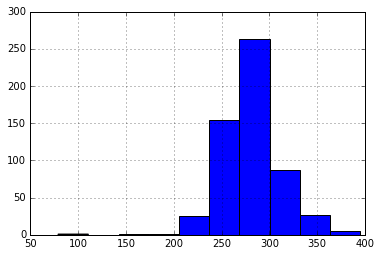

In [51]:
df.groupby('episode_id')['id'].nunique().hist()

#### Exercise A3: What are the minimum, maximum and mean episodes per season?

In [54]:
df.groupby('season')['episode_id'].nunique().agg(['min', 'mean', 'max'])

min     13.000000
mean    21.692308
max     25.000000
Name: episode_id, dtype: float64

#### Exercise A4: Show (plot) the distribution of the number of episodes per season.

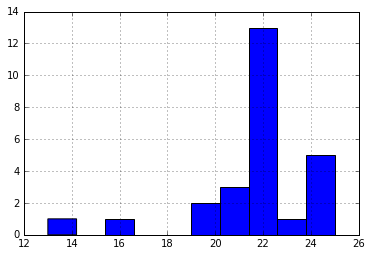

In [55]:
df.groupby('season')['episode_id'].nunique().hist()

#### Exercise A5: What are the minimum, maximun and mean number of characters appearing per episode?

In [57]:
df.groupby('episode_id')['raw_character_text'].nunique().agg(['min', 'mean', 'max'])

min     12.000000
mean    39.099291
max     69.000000
Name: raw_character_text, dtype: float64

#### Exercise A6: Show (plot) the distribution of the number of characters per episode.

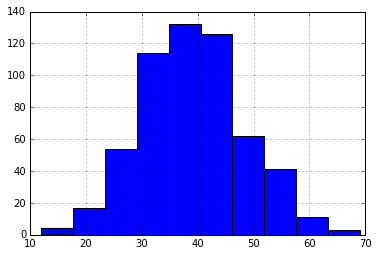

In [56]:
df.groupby('episode_id')['raw_character_text'].nunique().hist()

### Exercise Set B

Some of the interesting questions we might ask about The Simpsons are focused on the characters.

In order to simpify analysis of The Simpsons characters, it will be useful to construct a new `DataFrame` containing data associated with each character (vs. data associated with each episode or script line, although we will use data from both sources in constructing the new `DataFrame`).

The following exercises will focus primarily on using some standard `pandas` functions, and set the stage for doing some additional time series analysis.

#### Exercise B1: Determine the number of lines associated with each character

_(We will do this together)_

First, it is important to note that we have two fields in the `DataFrame` extracted from `simpsons_script_lilnes.csv` that are associated with characters:
* `character_id`: a unique identifier for each character
* `raw_character_text`: the full text (name) associated in the script with each appearance of a character

And it is further important to note that there are more distinct `raw_character_text` values than there are distinct `character_id` values. 

In [25]:
 df.raw_character_text.nunique(), df.character_id.nunique()

(6764, 6720)

If we group the script lines by `character_id` (using [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)) and then gather the distinct `raw_character_text` values associated with each `character_id` (using [`pandas.Series.unique()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html)), the first few rows indicate why there are more `raw_character_text` values than `character_id` values.

A given character can have different personae within the context of a show (e.g., "Marge Simpson" and "Young Marge").

In [26]:
df.groupby('character_id').raw_character_text.unique().head()

character_id
0                                                   []
1    [Marge Simpson, Young Marge, Marge's Thoughts,...
2    [Homer Simpson, Homer's Brain, Young Homer, Te...
3                                    [Seymour Skinner]
4                                              [JANEY]
Name: raw_character_text, dtype: object

If we group by both `character_id` and `raw_character_text`, and then find the number of rows in each group (using [`pandas.core.groupby.GroupBy.size()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.size.html)), and then convert the resulting [`MultiIndex`](https://pandas.pydata.org/pandas-docs/stable/advanced.html) object back into a `DataFrame` (using [`pandas.DataFrame.reset_index()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)), we can create a new DataFrame with a row for each `raw_character_text` value, wherein each row has 
* `character_id`: a non-unique value which may be shared across other `raw_character_text` rows
* `raw_character_text`: a unique full text (name) for the character
* a column indicating the number of script lines associated with that `raw_character_text` (labeled `0`)

In [27]:
df.groupby(['character_id', 'raw_character_text']).size().reset_index().head(10)

,character_id,raw_character_text,0
0,0,,17521
1,1,Marge Simpson,14157
2,1,Marge's Thoughts,23
3,1,Teenage Marge,11
4,1,Young Marge,72
5,2,Homer Simpson,29839
6,2,Homer's Brain,93
7,2,Homer's Thoughts,44
8,2,Teenage Homer,34
9,2,Young Homer,95


Alternatively, we could use [`pandas.Series.nunique()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html) to count the number of unique `id` values within each group.

In [28]:
df.groupby(['character_id', 'raw_character_text'])['id'].nunique().reset_index().head(10)

,character_id,raw_character_text,id
0,0,,17521
1,1,Marge Simpson,14157
2,1,Marge's Thoughts,23
3,1,Teenage Marge,11
4,1,Young Marge,72
5,2,Homer Simpson,29839
6,2,Homer's Brain,93
7,2,Homer's Thoughts,44
8,2,Teenage Homer,34
9,2,Young Homer,95


We can rename the column showing the number of script lines (using [`pandas.DataFrame.rename()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)), and assign the resulting `DataFrame` to a new variable, `df_characters`.

In [29]:
df_characters = df.groupby(['character_id', 'raw_character_text'])['id'].nunique().reset_index().rename(
    columns={'id': 'num_lines'})

In [30]:
df_characters.head(10)

,character_id,raw_character_text,num_lines
0,0,,17521
1,1,Marge Simpson,14157
2,1,Marge's Thoughts,23
3,1,Teenage Marge,11
4,1,Young Marge,72
5,2,Homer Simpson,29839
6,2,Homer's Brain,93
7,2,Homer's Thoughts,44
8,2,Teenage Homer,34
9,2,Young Homer,95


We can sort the characters based on the number of lines they have (using [`pandas.DataFrame.sort_values()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html).

In [31]:
df_characters.sort_values('num_lines', ascending=False).head(10)

,character_id,raw_character_text,num_lines
5,2,Homer Simpson,29839
0,0,,17521
1,1,Marge Simpson,14157
17,8,Bart Simpson,13776
21,9,Lisa Simpson,11500
29,15,C. Montgomery Burns,3172
32,17,Moe Szyslak,2863
10,3,Seymour Skinner,2443
25,11,Ned Flanders,2145
49,31,Grampa Simpson,1886


We can exclude the null character by restricting the rows to those for which `character_id>0` or those for which `raw_character_text!=''`:

In [32]:
df_characters[df_characters.character_id>0].sort_values('num_lines', ascending=False).head(10)

,character_id,raw_character_text,num_lines
5,2,Homer Simpson,29839
1,1,Marge Simpson,14157
17,8,Bart Simpson,13776
21,9,Lisa Simpson,11500
29,15,C. Montgomery Burns,3172
32,17,Moe Szyslak,2863
10,3,Seymour Skinner,2443
25,11,Ned Flanders,2145
49,31,Grampa Simpson,1886
42,25,Milhouse Van Houten,1862


#### Exercise B2: Determine the number of episodes in which each character appears.

More specifically: add a new column to `df_characters`, named `num_episodes`, containing a count of the number of `episode_id` values associated with each `raw_character_text` value.

It may be useful to break this down into two steps:
* Create a new `DataFrame` containing the number of `episode_id` values associated with each `raw_character_text` value (hint: you might use  [`pandas.Series.nunique()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html) again)
* [Merge](http://pandas.pydata.org/pandas-docs/stable/merging.html) that `DataFrame` with the existing `df_characters` (using [`pandas.DataFrame.merge()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html))

In [33]:
df.groupby('raw_character_text')['episode_id'].nunique().reset_index().head()

,raw_character_text,episode_id
0,,564
1,"""For Dummies"" Author",1
2,"""Just Stamp the Ticket"" Man",5
3,"""Mario"" #2",1
4,"""Shorts"" Bart",1


In [34]:
df.groupby('raw_character_text')['episode_id'].nunique().reset_index().rename(
    columns={'episode_id': 'num_episodes'}).head(10)

,raw_character_text,num_episodes
0,,564
1,"""For Dummies"" Author",1
2,"""Just Stamp the Ticket"" Man",5
3,"""Mario"" #2",1
4,"""Shorts"" Bart",1
5,"""Shorts"" Homer",1
6,"""Shorts"" Lisa",1
7,"""Shorts"" Marge",1
8,"""Yeeeessss"" Man",1
9,"""Yesss"" Man",1


In [35]:
df_characters = df_characters.merge(
    df.groupby('raw_character_text')['episode_id'].nunique().reset_index().rename(
        columns={'episode_id': 'num_episodes'}),
    on='raw_character_text',
    how='left')
df_characters.head(10)

,character_id,raw_character_text,num_lines,num_episodes
0,0,,17521,564
1,1,Marge Simpson,14157,563
2,1,Marge's Thoughts,23,17
3,1,Teenage Marge,11,3
4,1,Young Marge,72,4
5,2,Homer Simpson,29839,564
6,2,Homer's Brain,93,47
7,2,Homer's Thoughts,44,26
8,2,Teenage Homer,34,7
9,2,Young Homer,95,10


#### Exercise B3: Determine the first and last episodes in which each character appears

More specifically, add the following columns to `df_characters`:
* `first_episode_id`: the first (smallest) `episode_id` in which the associated `raw_character_text` value appears
* `last_episode_id`: the last (largest) `episode_id` in which the associated `raw_character_text` value appears

You can either follow the pattern in the previous exercise - twice - or combine the two into a single grouping (using the [`pandas.core.groupby.DataFrameGroupBy.agg()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)) before merging.

In [36]:
df.groupby('raw_character_text')['episode_id'].agg(['first', 'last']).reset_index().rename(
    columns={'first': 'first_episode_id', 'last': 'last_episode_id'}).head(10)

,raw_character_text,first_episode_id,last_episode_id
0,,1,568
1,"""For Dummies"" Author",251,251
2,"""Just Stamp the Ticket"" Man",68,555
3,"""Mario"" #2",139,139
4,"""Shorts"" Bart",502,502
5,"""Shorts"" Homer",502,502
6,"""Shorts"" Lisa",502,502
7,"""Shorts"" Marge",502,502
8,"""Yeeeessss"" Man",321,321
9,"""Yesss"" Man",325,325


In [37]:
df_characters = df_characters.merge(
    df.groupby('raw_character_text')['episode_id'].agg(
        ['first', 'last']).reset_index().rename(
    columns={'first': 'first_episode_id', 'last': 'last_episode_id'}),
    on='raw_character_text',
    how='left')
df_characters.head(10)

,character_id,raw_character_text,num_lines,num_episodes,first_episode_id,last_episode_id
0,0,,17521,564,1,568
1,1,Marge Simpson,14157,563,1,568
2,1,Marge's Thoughts,23,17,87,561
3,1,Teenage Marge,11,3,184,510
4,1,Young Marge,72,4,34,411
5,2,Homer Simpson,29839,564,1,568
6,2,Homer's Brain,93,47,35,535
7,2,Homer's Thoughts,44,26,278,561
8,2,Teenage Homer,34,7,68,510
9,2,Young Homer,95,10,43,516


#### Exercise B4: Determine the number of seasons, the first season and the last season in which a character appears

More specifically, add the following columns to `df_characters`:
* `num_seasons`: the number of distinct `seasons` in which the associated `raw_character_text` appears
* `first_season`: the first `season` in which the associated `raw_character_text` value appears
* `last_episode_id`: the last `season` in which the associated `raw_character_text` value appears

You should be able to modify the code you wrote for Exercises 2 and 3 above to address this task.

In [38]:
column_label = 'season'

df_characters = df_characters.merge(
    df.groupby('raw_character_text')[column_label].nunique().reset_index().rename(
        columns={column_label: 'num_{}s'.format(column_label)}),
    on='raw_character_text',
    how='left')

df_characters = df_characters.merge(
    df.groupby('raw_character_text')[column_label].agg(['first', 'last']).reset_index().rename(
        columns={'first': 'first_{}'.format(column_label), 
                 'last': 'last_{}'.format(column_label)}),
    on='raw_character_text',
    how='left')

df_characters.head(10)

,character_id,raw_character_text,num_lines,num_episodes,first_episode_id,last_episode_id,num_seasons,first_season,last_season
0,0,,17521,564,1,568,26,1,26
1,1,Marge Simpson,14157,563,1,568,26,1,26
2,1,Marge's Thoughts,23,17,87,561,12,5,26
3,1,Teenage Marge,11,3,184,510,3,9,24
4,1,Young Marge,72,4,34,411,4,2,19
5,2,Homer Simpson,29839,564,1,568,26,1,26
6,2,Homer's Brain,93,47,35,535,15,2,25
7,2,Homer's Thoughts,44,26,278,561,13,13,26
8,2,Teenage Homer,34,7,68,510,7,4,24
9,2,Young Homer,95,10,43,516,10,3,24


In [39]:
def create_simpsons_characters_dataframe(df):
    df_characters = df.groupby(
        ['character_id', 'raw_character_text'])['id'].nunique().reset_index().rename(
        columns={'id': 'num_lines'})
    for column_label in ['episode_id', 'season']:
        df_characters = df_characters.merge(
            df.groupby('raw_character_text')[column_label].nunique().reset_index().rename(
                columns={column_label: 'num_{}s'.format(column_label.replace('_id', ''))}),
            on='raw_character_text',
            how='left')
        df_characters = df_characters.merge(
            df.groupby('raw_character_text')[column_label].agg(
                ['first', 'last']).reset_index().rename(
                columns={'first': 'first_{}'.format(column_label), 
                         'last': 'last_{}'.format(column_label)}),
            on='raw_character_text',
            how='left')
    return df_characters

In [40]:
df_characters = create_simpsons_characters_dataframe(df)

In [41]:
df_characters.head(10)

,character_id,raw_character_text,num_lines,num_episodes,first_episode_id,last_episode_id,num_seasons,first_season,last_season
0,0,,17521,564,1,568,26,1,26
1,1,Marge Simpson,14157,563,1,568,26,1,26
2,1,Marge's Thoughts,23,17,87,561,12,5,26
3,1,Teenage Marge,11,3,184,510,3,9,24
4,1,Young Marge,72,4,34,411,4,2,19
5,2,Homer Simpson,29839,564,1,568,26,1,26
6,2,Homer's Brain,93,47,35,535,15,2,25
7,2,Homer's Thoughts,44,26,278,561,13,13,26
8,2,Teenage Homer,34,7,68,510,7,4,24
9,2,Young Homer,95,10,43,516,10,3,24


In [42]:
df.head()

,id,season,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,1,1,1,0,(Street: ext. street - establishing - night),8000,False,0,1,,Street,,,0
1,2,1,1,1,(Car: int. car - night),8000,False,0,2,,Car,,,0
2,3,1,1,2,"Marge Simpson: Ooo, careful, Homer.",8000,True,1,2,Marge Simpson,Car,"Ooo, careful, Homer.",ooo careful homer,3
3,4,1,1,3,Homer Simpson: There's no time to be careful.,10000,True,2,2,Homer Simpson,Car,There's no time to be careful.,theres no time to be careful,6
4,5,1,1,4,Homer Simpson: We're late.,10000,True,2,2,Homer Simpson,Car,We're late.,were late,2


### Exercise Set C

Now that we have `df_characters` constructed, we can do some additional analysis (more easily).

#### Exercise C1: What are the minimum, maximum and mean number of script lines per character?

In [43]:
df_characters.num_lines.agg(['min', 'max', 'mean', 'median'])

min           1.000000
max       29839.000000
mean         23.395476
median        2.000000
Name: num_lines, dtype: float64

Other analyses
* Lines per episode, lines per season - average, median, graphing?
* Words per episode, words per season, words per line
* Characters per episode, characters per season

## Unevenly spaced time series analysis

As noted earlier (from the Wikipedia article on Time series):

> Most commonly, a time series is a sequence taken at successive equally spaced points in time

Unevenly spaced time series analysis involves data points that are spaced over a sequence of unequal time intervals. The sizes of the intervals themselves are often a focus of such analysis.

Examples of such analyses I've done at Indeed include
* identifying "repeat business" from Indeed Hire clients, based on different definitions of "repeat", by analyzing the intervals between the dates on which new job requisitions from the same client were created
* determining how much time Indeed Hire recruiters spend reviewing candidate resumes and cover letters, by analyzing the intervals between candidate profile dispositions

Within the context of this tutorial, we'll restrict our focus to unevenly spaced time series analysis of The Simpsons.

### Identify scene changes (an unevenly spaced time series analysis)

One potential indicator of scene changes is changes of location.

One way to identify changes of location is to create a new column with the location id of the previous script line and then look for rows in which the previous location id is different from the [current] location id.

It is important to remember that there is noise in the data, including script lines for which no location information is available. 

In [61]:
(len(df[df.location_id==0]), 
 len(df[df.raw_location_text=='']), 
 len(df[(df.location_id==0) & (df.raw_location_text=='')]))

(407, 407, 407)

In [58]:
df[df.location_id==0].head()

,id,season,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
4576,4588,2,16,0,"Marge Simpson: (CLEARING HER THROAT) Hello, ev...",5000,True,1,0,Marge Simpson,,"Hello, everyone. You know, Halloween is a very...",hello everyone you know halloween is a very st...,83
12759,12786,3,43,0,Homer-Ape: (INSPIRED) Oooh.,37000,True,625,0,Homer-Ape,,Oooh.,oooh,1
12760,12787,3,43,1,Homer-Ape: (ADJUSTING HIMSELF) Ahhh.,95000,True,625,0,Homer-Ape,,Ahhh.,ahhh,1
14586,14613,3,49,0,"Bret: Hey everybody, Bret Gunsilman here in pi...",35000,True,704,0,Bret,,"Hey everybody, Bret Gunsilman here in pivotal ...",hey everybody bret gunsilman here in pivotal w...,14
15222,15249,3,51,0,"Teenager: Hey, what gives?",30000,True,628,0,Teenager,,"Hey, what gives?",hey what gives,3


As with character data, some `location_id` values are associated with more than one `raw_location_text` value.

In [65]:
(df.location_id.nunique(), 
 df.raw_location_text.nunique(), 
 df.raw_location_text.str.lower().nunique())

(4460, 4499, 4492)

In [67]:
df[df.location_id>0].raw_location_text.value_counts().head()

Simpson Home                       35056
Springfield Elementary School       7092
Moe's Tavern                        4626
Springfield Nuclear Power Plant     3593
Kwik-E-Mart                         1476
Name: raw_location_text, dtype: int64

In [68]:
df[df.location_id>0].raw_location_text.value_counts().tail()

DUMP                 1
MISTY FOREST         1
Vermont              1
PLYMOUTH, ENGLAND    1
SPRINGFIELD - DAY    1
Name: raw_location_text, dtype: int64

In the context of this tutorial, we will simply forge ahead, noting that the results below are, at best, approximate.

### Exercise Set D

#### Exercise D1: Add a column, `prev_location_id`, to contain the previous  `location_id` for each script line within a given season

The [`pandas.DataFrame.shift()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html) function can be used to return the rows of a `DataFrame` shifted by some offset (the default offset is 1 row). Positive offsets can be interpreted as shifting "down", which allows us to easily access previous rows.

In [74]:
df.location_id.head()

0    1
1    2
2    2
3    2
4    2
Name: location_id, dtype: int64

In [73]:
df.location_id.shift().head()

0    NaN
1    1.0
2    2.0
3    2.0
4    2.0
Name: location_id, dtype: float64

We can also use negative offset values to shift "up" for next rows.

In [75]:
df.location_id.shift(-1).head()

0    2.0
1    2.0
2    2.0
3    2.0
4    3.0
Name: location_id, dtype: float64

We'll want to first group by episode.

In [77]:
df.groupby(['episode_id']).location_id.shift().head()

0    NaN
1    1.0
2    2.0
3    2.0
4    2.0
Name: location_id, dtype: float64

And to keep things consistent with the `location_id` field, we can substitute zero for null (`NaN`) values.

In [78]:
df.groupby('episode_id').location_id.shift().fillna(0).astype('int64').head()

0    0
1    1
2    2
3    2
4    2
Name: location_id, dtype: int64

In [80]:
df.loc[:, 'prev_location_id'] = df.groupby('episode_id').location_id.shift().fillna(0).astype('int64')

In [81]:
df[['location_id', 'prev_location_id']].head()

,location_id,prev_location_id
0,1,0
1,2,1
2,2,2
3,2,2
4,2,2


#### Exercise D2: How many scene changes are there across all episodes?

If we conveniently ignore the fact that we have rows with missing locations (where `location_id==0`), we can compute this by simply counting the number of rows where the `location_id` and `prev_location_id` differ.

In [41]:
len(df[df.location_id != df.prev_location_id])

17122

Most script lines take place within the same scene (location).

In [42]:
len(df[df.location_id == df.prev_location_id])

141133